ResNet50 from pytorch
---
... pretrained on ImageNet

In [31]:
import torchvision
import torch
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

model = torchvision.models.resnet50(pretrained=True)
model.eval().to(device)

# some sample images

img_urls = [
    'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
    'http://farm4.staticflickr.com/3792/8796830949_232ca32d23_z.jpg',
    'http://farm9.staticflickr.com/8535/8694098962_7bc1827ce8_z.jpg',
]

import json

with open("LOC_synset_mapping.json") as fp:
    labels = json.load(fp)

Using cpu for inference


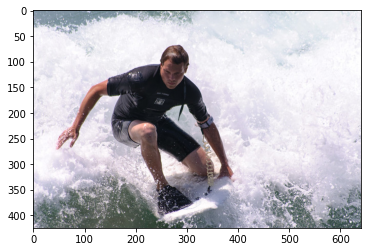

['tub, vat', 'shovel', 'swimming trunks, bathing trunks', 'paddle, boat paddle', 'sandbar, sand bar']
tensor([876, 792, 842, 693, 977])


In [94]:
np.random.seed(0)

img = Image.open(requests.get(np.random.choice(img_urls), stream=True).raw)
plt.imshow(img)
plt.show()

transform = torchvision.transforms.ToTensor()
img_th = transform(img)

# to add 4th dimension for batch
X = img_th.unsqueeze(0)

pred = model(X)

# best n of the 1000 categories
n_best = 5
n_best_i = torch.topk(pred[0], n_best)[1] # alternative torch.flip(pred[0].argsort()[-n_best:], [0])
print([labels[i] for i in n_best_i])
print(n_best_i)